# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira deseja entender melhor o perfil de renda de seus novos clientes para diferentes objetivos, como, por exemplo, dimensionar adequadamente o limite dos cartões de crédito sem necessariamente solicitar holerites ou outros documentos que possam comprometer a experiência do cliente.

Para isso, realizou um estudo com alguns clientes, comprovando suas rendas por meio de holerites e outros documentos. Agora, pretende construir um modelo preditivo dessa renda com base em algumas variáveis que já tem em seu banco de dados.

> **Fonte:** [M10_tarefa_01.ipynb](https://github.com/ohallao/Ebac-Exercises/blob/main/P12%20-%20An%C3%A1lise%20descritiva%20para%20resposta%20cont%C3%ADnua/M10_tarefa_01.ipynb)

## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER </span>


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis                                       | object|
| id_cliente              |  Código identificador exclusivo do cliente                                       | int|
| sexo                    | Sexo do cliente                                       | object (binária)|
| posse_de_veiculo        | Indica se o cliente possui veículo                                      | bool (binária)|
| posse_de_imovel         |  Indica se o cliente possui imóvel                                      | bool (binária)|
| qtd_filhos              |  Quantidade de filhos do cliente                                       | int|
| tipo_renda              |  Tipo de renda do cliente (Empresário, Assalariado, Servidor público, Pensionista, Bolsista)                                       | object|
| educacao                |  Grau de instrução do cliente (Primário, Secundário, Superior incompleto, Superior completo, Pós graduação)                                       | object|
| estado_civil            |  Estado civil do cliente                                       | object|
| tipo_residencia         |  Tipo de residência do cliente                                       | object|
| idade                   |  Idade do cliente em anos                                       | int|
| tempo_emprego           |  Tempo no emprego atual                                       | float|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                       | float|
| renda                   |  Valor numérico decimal representando a renda do cliente em reais                                       | floatI|





#### Carregando os pacotes


In [ ]:
!pip install ydata-profiling

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import time

from ydata_profiling import ProfileReport
import os

from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

import graphviz

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [3]:
renda = pd.read_csv('/content/previsao_de_renda.csv')

In [4]:
renda = renda.drop(columns='Unnamed: 0', axis=1)

renda['data_ref'] = pd.to_datetime(renda['data_ref'])
renda

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('/content/')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:360: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

####  Estatísticas descritivas das variáveis quantitativas

In [7]:
renda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_cliente,15000.0,8304.871400,4797.780446,1.000000,4181.000000,8297.000000,12403.000000,16649.000000
qtd_filhos,15000.0,0.432333,0.746631,0.000000,0.000000,0.000000,1.000000,14.000000
idade,15000.0,43.882333,11.273155,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12427.0,7.722635,6.711189,0.117808,2.973973,6.013699,10.120548,42.906849
qt_pessoas_residencia,15000.0,2.206400,0.909792,1.000000,2.000000,2.000000,3.000000,15.000000
renda,15000.0,5697.287057,8266.816289,118.710000,2026.110000,3499.720000,6392.167500,245141.670000


### Entendimento dos dados - Bivariadas




#### Matriz de correlação

In [8]:
renda.corr()

<ipython-input-8-3b9cb7805b38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  renda.corr()


,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
id_cliente,1.000000,-0.012072,-0.102863,0.030296,-0.057812,-0.036373,0.037951,-0.009129
posse_de_veiculo,-0.012072,1.000000,-0.014172,0.118690,-0.178903,-0.076155,0.167240,0.100493
posse_de_imovel,-0.102863,-0.014172,1.000000,-0.022738,0.140510,0.009465,-0.023415,0.003880
qtd_filhos,0.030296,0.118690,-0.022738,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.057812,-0.178903,0.140510,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.036373,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.037951,0.167240,-0.023415,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,-0.009129,0.100493,0.003880,0.029346,0.022435,0.385013,0.047842,1.000000


Com base na matriz de correlação, percebe-se que 'tempo_emprego' é a variável com a correlação mais forte em relação à 'renda', registrando um índice de 38,5%.

#### Matriz de dispersão

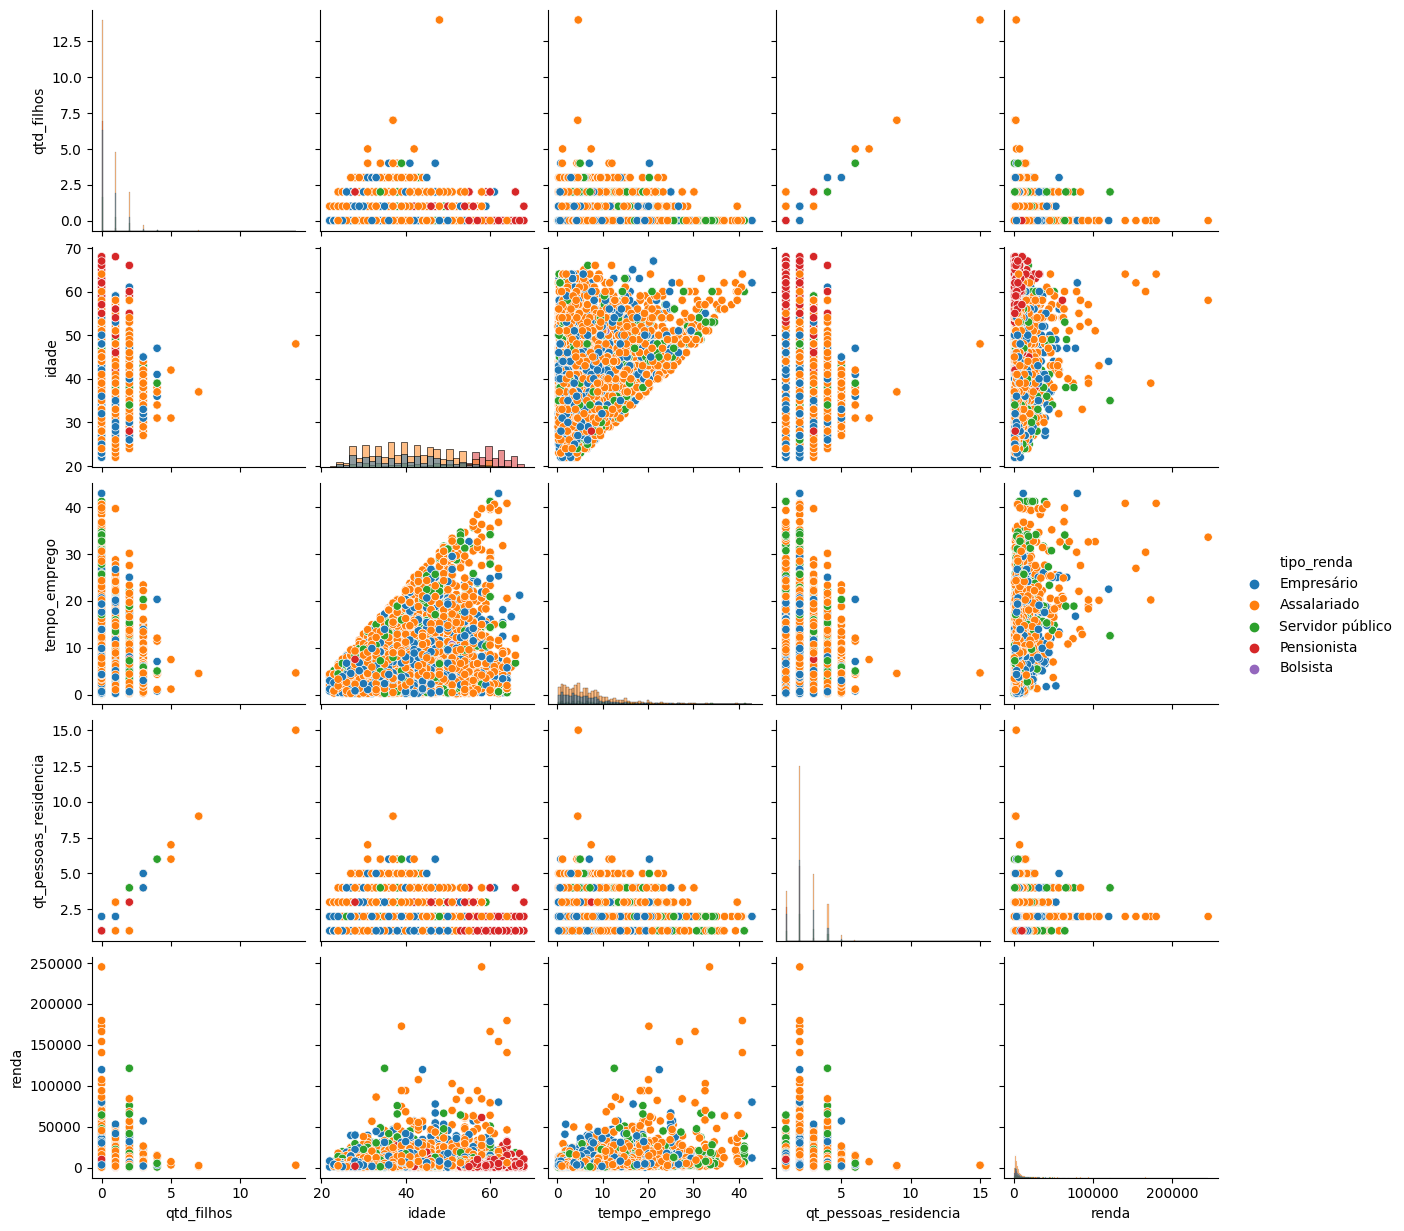

In [9]:
sns.pairplot(data=renda,
             hue='tipo_renda',
             vars=['qtd_filhos',
                   'idade',
                   'tempo_emprego',
                   'qt_pessoas_residencia',
                   'renda'],
             diag_kind='hist')

####Clustermap

<ipython-input-10-f85579ca11a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(renda.corr(), annot=True)


<Axes: >

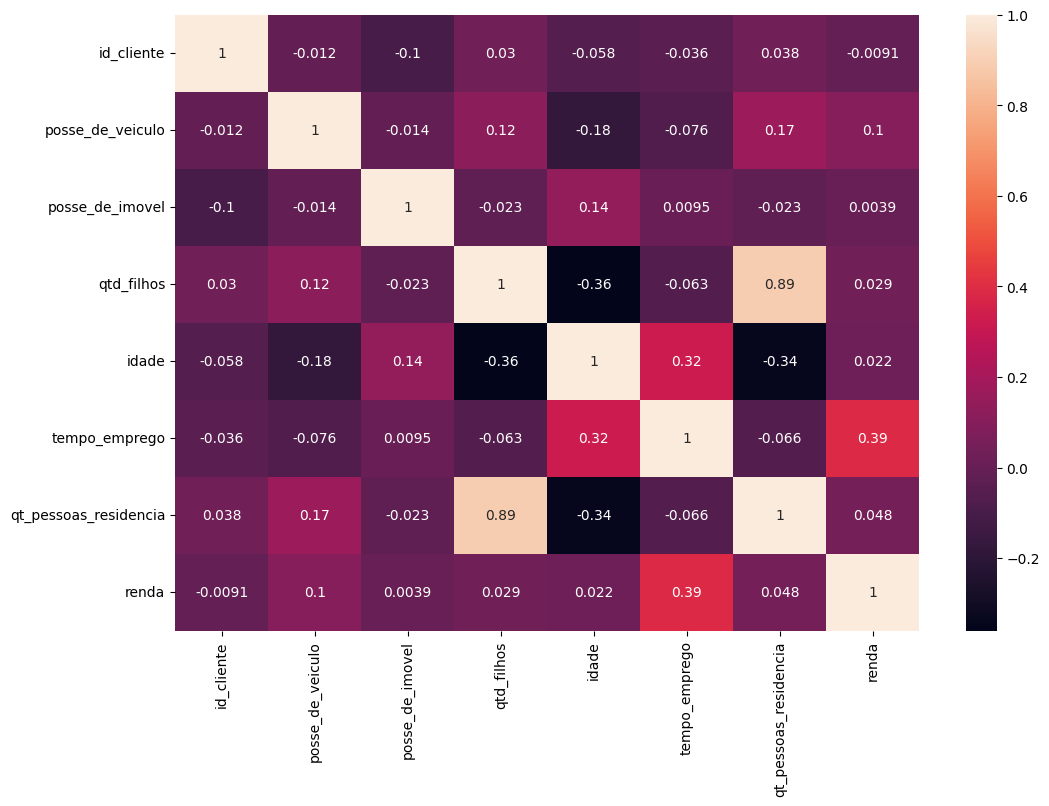

In [10]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(renda.corr(), annot=True)

Utilizando o clustermap, observamos novamente uma correlação baixa com a variável renda. A variável tempo_emprego é a única que exibe um índice digno de análise. Adicionalmente, introduzimos duas variáveis booleanas: posse_de_imovel e posse_de_veiculo, que, no entanto, também demonstram uma correlação limitada com renda.

####Linha de tendência

<Axes: xlabel='tempo_emprego', ylabel='renda'>

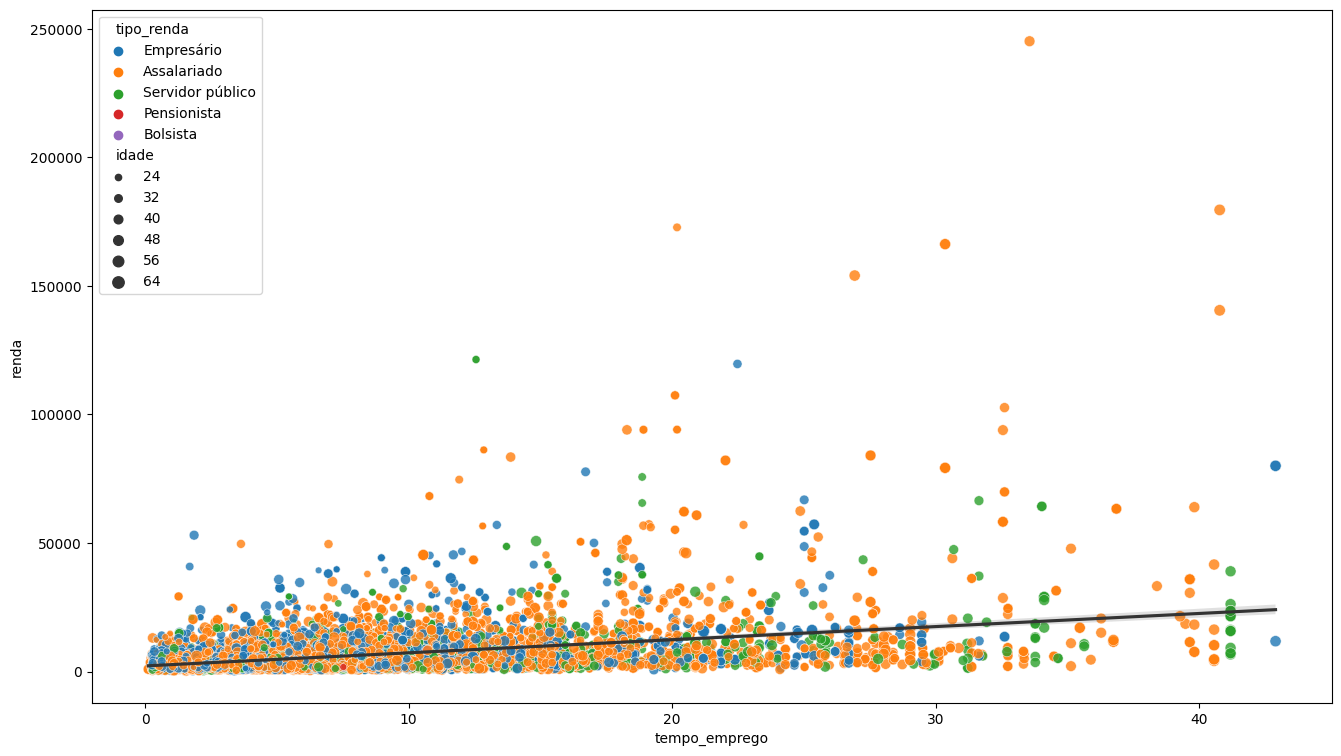

In [11]:
#variáveis mais correlacionadas com renda - Tempo_emprego (0.39)
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',
                y='renda',
                hue='tipo_renda',
                size='idade',
                data=renda,
                alpha=0.8)
sns.regplot(x='tempo_emprego',
            y='renda',
            data=renda,
            scatter=False,
            color='0.2')


A inclinação da linha de tendência revela uma covariância positiva, mesmo que a correlação entre as variáveis tempo_emprego e renda não seja tão alta.

####Análise das variáveis qualitativas

#####Análise de variáveis booleanas

Text(1.5, 6685.210469657279, 'posse_de_veiculo')

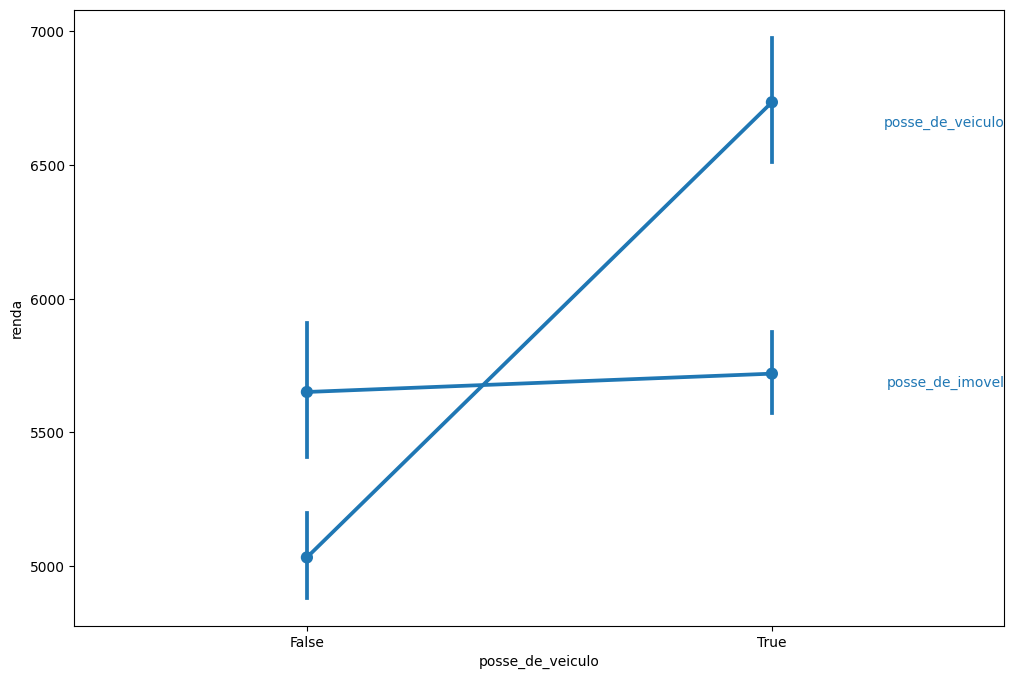

In [12]:
sns.pointplot(renda, x= 'posse_de_imovel', y='renda')
line1 = plt.gca().get_lines()[0]
y1 = line1.get_ydata().mean()
plt.text(1.5, y1, 'posse_de_imovel', va="center", ha="right", color=line1.get_color())
sns.pointplot(renda, x= 'posse_de_veiculo', y='renda')
line2 = plt.gca().get_lines()[0]
y2 = line2.get_ydata().mean()+1000
plt.text(1.5, y2, 'posse_de_veiculo', va="top", ha="right", color=line2.get_color())

Comparando os gráficos, a variável posse_de_veículo tem maior impacto na predição de renda devido à ampla distância entre os intervalos de confiança. Em contraste, a variável posse_de_imóvel não mostra diferenças significativas entre as condições de posse.

####Gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo


<ipython-input-13-ec0e39289126>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


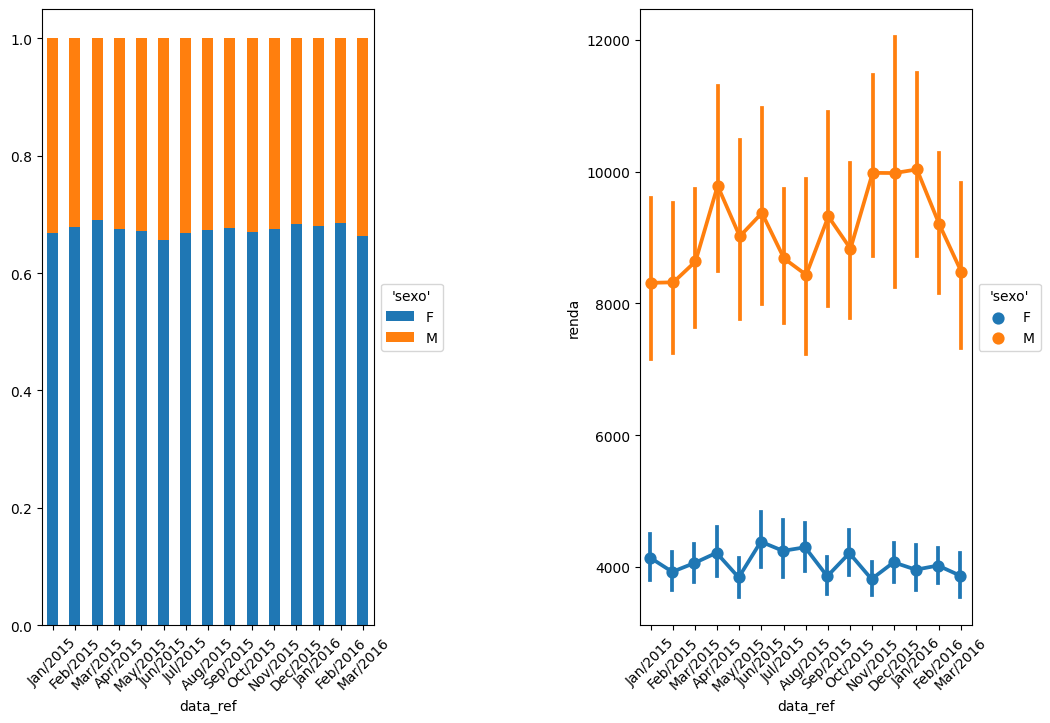

<ipython-input-13-ec0e39289126>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


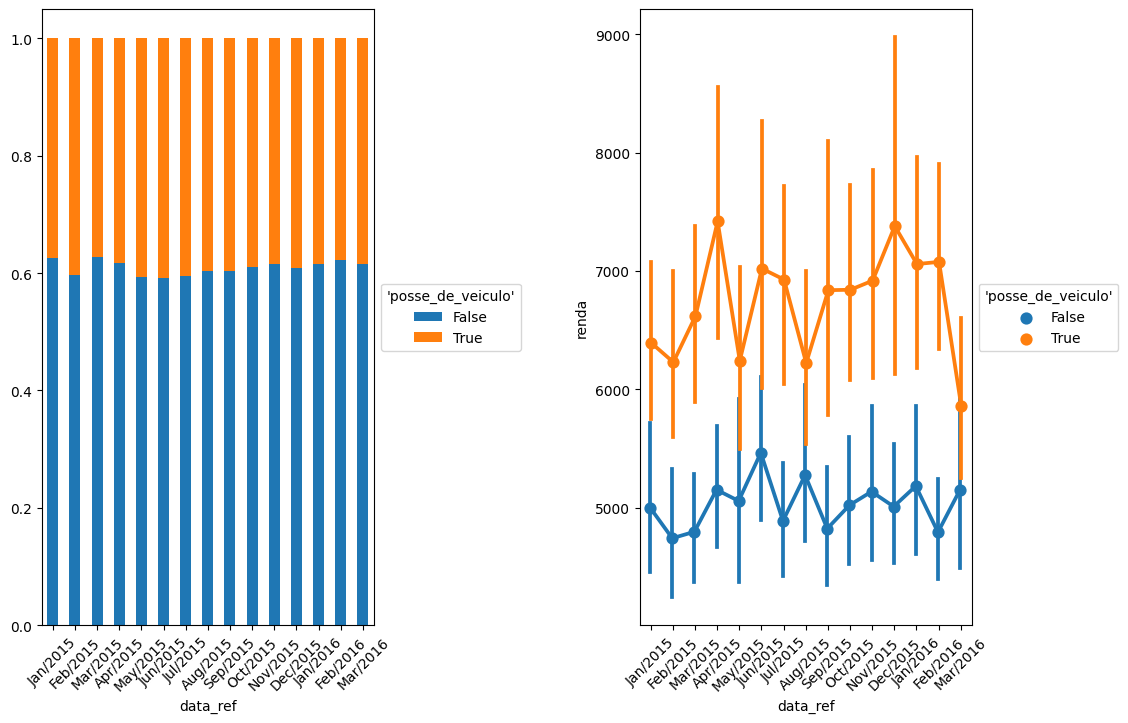

<ipython-input-13-ec0e39289126>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


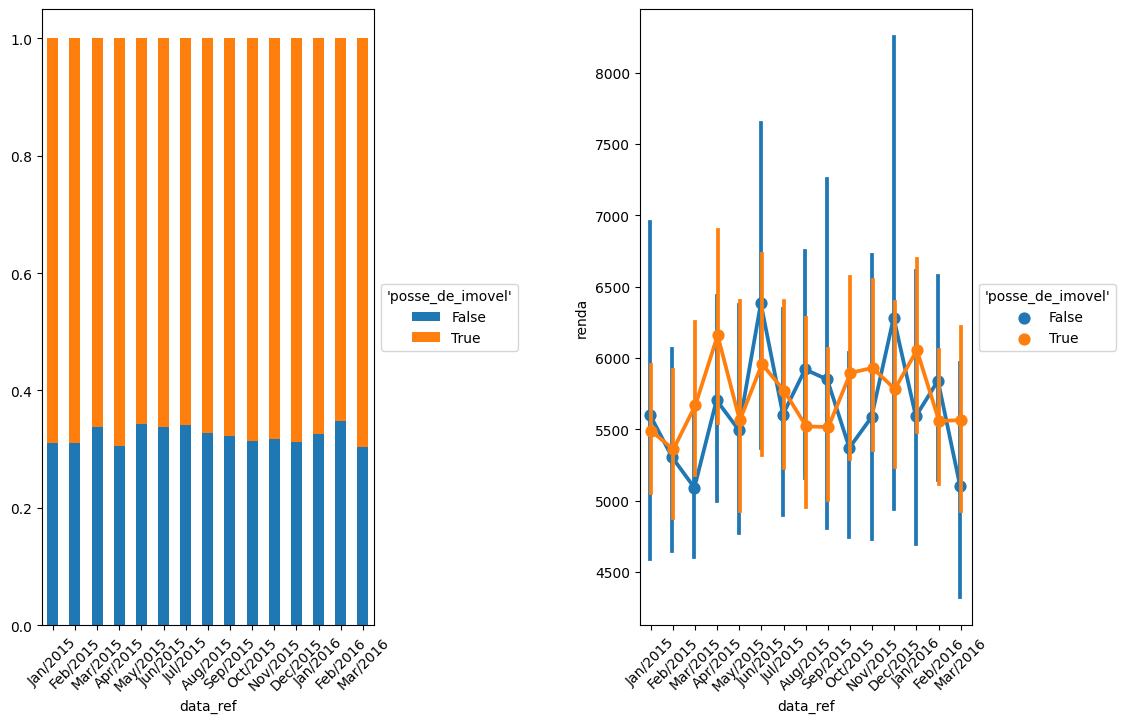

<ipython-input-13-ec0e39289126>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


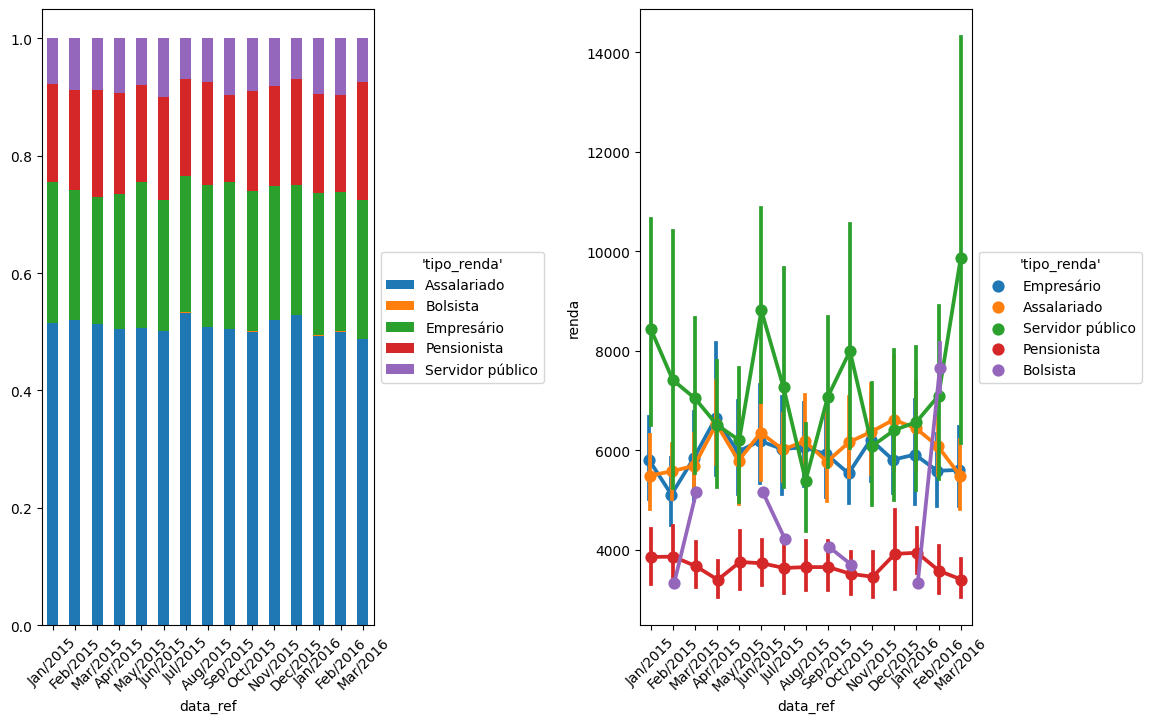

<ipython-input-13-ec0e39289126>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


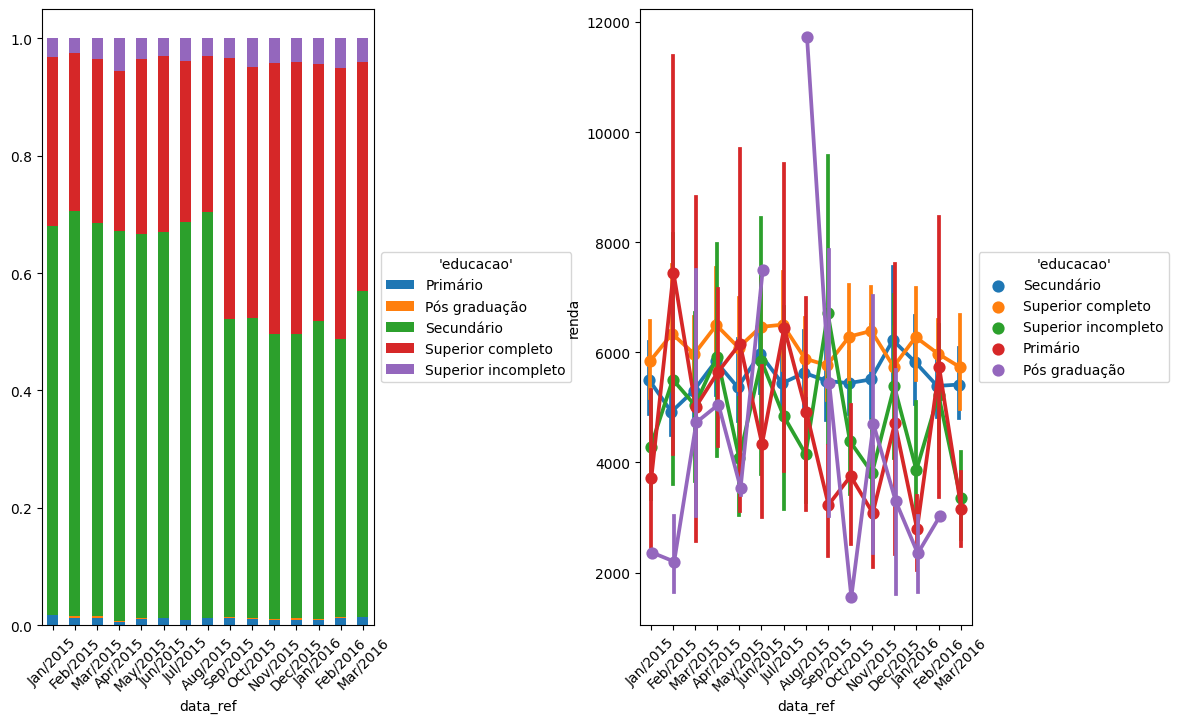

<ipython-input-13-ec0e39289126>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


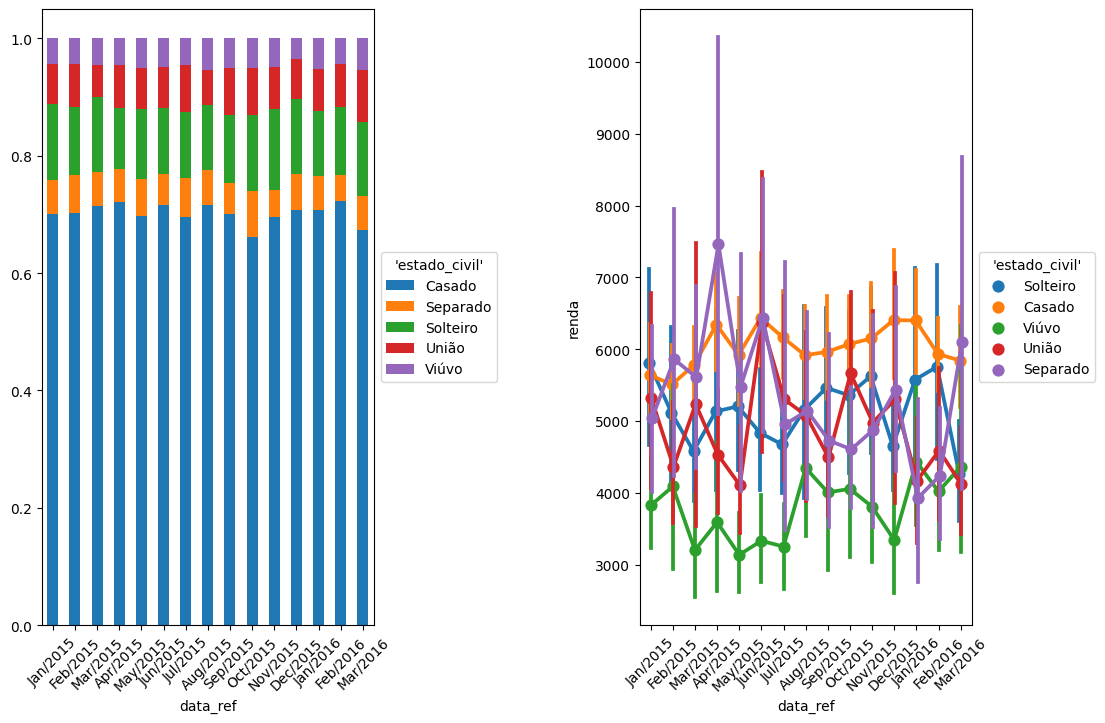

<ipython-input-13-ec0e39289126>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


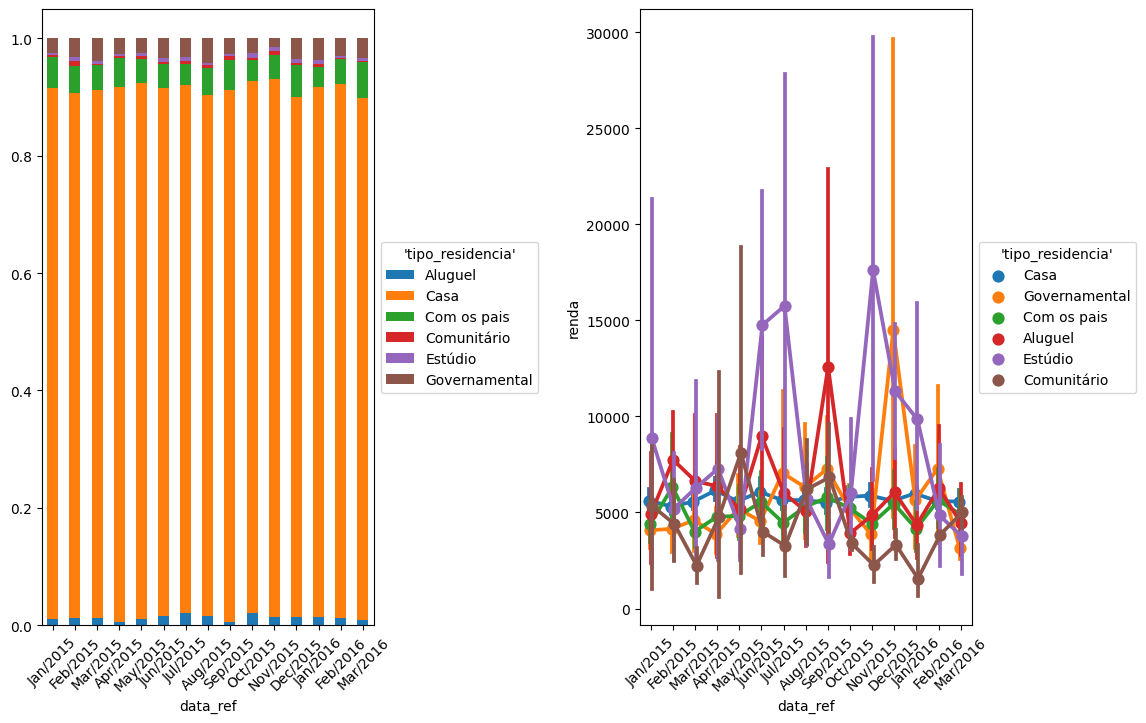

In [13]:
qualitativa_renda = renda.select_dtypes(include=['object', 'boolean'])

for col in qualitativa_renda:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.8)

    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()

    # gráfico de barras
    renda_crosstab = pd.crosstab(index=renda['data_ref'],
                                 columns=renda[col],
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True,
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")

    # gráfico mostrando as médias de cada nível da variável no tempoo:
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")

    plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [14]:
renda.drop(columns='id_cliente', inplace=True)
renda.dropna(inplace=True)
renda.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               12427 non-null  datetime64[ns]
 1   sexo                   12427 non-null  object        
 2   posse_de_veiculo       12427 non-null  bool          
 3   posse_de_imovel        12427 non-null  bool          
 4   qtd_filhos             12427 non-null  int64         
 5   tipo_renda             12427 non-null  object        
 6   educacao               12427 non-null  object        
 7   estado_civil           12427 non-null  object        
 8   tipo_residencia        12427 non-null  object        
 9   idade                  12427 non-null  int64         
 10  tempo_emprego          12427 non-null  float64       
 11  qt_pessoas_residencia  12427 non-null  float64       
 12  renda                  12427 non-null  float64       
dtypes

###Conversão das variáveis categóricas em variáveis numéricas (dummies)

In [15]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data_ref                       12427 non-null  datetime64[ns]
 1   posse_de_veiculo               12427 non-null  bool          
 2   posse_de_imovel                12427 non-null  bool          
 3   qtd_filhos                     12427 non-null  int64         
 4   idade                          12427 non-null  int64         
 5   tempo_emprego                  12427 non-null  float64       
 6   qt_pessoas_residencia          12427 non-null  float64       
 7   renda                          12427 non-null  float64       
 8   sexo_F                         12427 non-null  uint8         
 9   sexo_M                         12427 non-null  uint8         
 10  tipo_renda_Assalariado         12427 non-null  uint8         
 11  tipo_renda_Bols

In [16]:
#matriz de correlação em funcao da renda, pois se fizesse de todas as variaveis nao ficaria legivel
renda_dummies.corr()['renda'].sort_values(ascending=False)

<ipython-input-16-29fc7eb0ad68>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  renda_dummies.corr()['renda'].sort_values(ascending=False)


renda                            1.000000
tempo_emprego                    0.385013
sexo_M                           0.265325
idade                            0.127069
posse_de_veiculo                 0.083105
estado_civil_Casado              0.054248
tipo_renda_Servidor público      0.042051
tipo_residencia_Estúdio          0.028391
educacao_Superior completo       0.018961
qt_pessoas_residencia            0.018683
posse_de_imovel                  0.015367
tipo_residencia_Casa             0.014470
tipo_residencia_Governamental    0.005098
qtd_filhos                       0.002192
tipo_residencia_Aluguel         -0.000717
educacao_Secundário             -0.003260
tipo_renda_Bolsista             -0.003609
tipo_renda_Pensionista          -0.009129
tipo_renda_Assalariado          -0.010409
educacao_Primário               -0.010492
educacao_Pós graduação          -0.011118
estado_civil_Separado           -0.011293
tipo_residencia_Comunitário     -0.013116
tipo_renda_Empresário           -0

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [22]:
X = renda_dummies.drop(columns=['renda', 'data_ref'])
y = renda_dummies['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
max_depth_range = range(1, 11)  # Aqui estamos considerando árvores de profundidade de 1 a 10
scores = {}

for depth in max_depth_range:
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train, y_train)

    score = tree.score(X_train, y_train)

    scores[depth] = score
    print(f"Depth: {depth}, Score (R^2): {score:.2f}")

Depth: 1, Score (R^2): 0.10
Depth: 2, Score (R^2): 0.28
Depth: 3, Score (R^2): 0.42
Depth: 4, Score (R^2): 0.50
Depth: 5, Score (R^2): 0.53
Depth: 6, Score (R^2): 0.57
Depth: 7, Score (R^2): 0.62
Depth: 8, Score (R^2): 0.66
Depth: 9, Score (R^2): 0.70
Depth: 10, Score (R^2): 0.72


###Escolhendo o Modelo

In [44]:
tree1 = DecisionTreeRegressor(max_depth = 4)

tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

###Visualização gráfica da árvore com Graphviz

In [45]:
#Gera um output source.gv.pdf para melhor visualizacao da arvore.
dot_data = export_graphviz(tree1, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [46]:
r2_train = round(tree1.score(X=X_train, y=y_train), 2)
r2_test = round(tree1.score(X=X_test, y=y_test), 2)
print(r2_train)
print(r2_test)

0.5
0.35


#### O coeficiente de determinação R^2 da árvore com profundidade igual a 4 para a base de treino é de 0,50 e da base de teste é de 0.35

In [47]:
renda['renda_predict'] = np.round(tree1.predict(X), 2)
renda[['renda', 'renda_predict']]

,renda,renda_predict
0,8060.34,3522.02
1,1852.15,7890.59
2,2253.89,2829.75
3,6600.77,3522.02
4,6475.97,4811.72
...,...,...
14994,1592.57,10796.97
14995,7990.58,6142.67
14997,604.82,3522.02
14998,3352.27,4811.72


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [ ]:
# Criando input para as variaveis
sexo = input("Informe o sexo (M/F): ")
posse_de_veiculo = input("Possui veículo? (True/False): ") == 'True'
posse_de_imovel = input("Possui imóvel? (True/False): ") == 'True'
qtd_filhos = int(input("Quantidade de filhos: "))
tipo_renda = input("Tipo de renda (ex: Assalariado): ")
educacao = input("Educação (ex: Superior completo): ")
estado_civil = input("Estado civil (ex: Solteiro): ")
tipo_residencia = input("Tipo de residência (ex: Casa): ")
idade = int(input("Idade: "))
tempo_emprego = input("Tempo de emprego (anos ou None se não aplicável): ")
tempo_emprego = None if tempo_emprego == 'None' else int(tempo_emprego)
qt_pessoas_residencia = int(input("Quantidade de pessoas na residência: "))

# criando um Dataframe com input
entrada = pd.DataFrame([{'sexo': sexo,
                         'posse_de_veiculo': posse_de_veiculo,
                         'posse_de_imovel': posse_de_imovel,
                         'qtd_filhos': qtd_filhos,
                         'tipo_renda': tipo_renda,
                         'educacao': educacao,
                         'estado_civil': estado_civil,
                         'tipo_residencia': tipo_residencia,
                         'idade': idade,
                         'tempo_emprego': tempo_emprego,
                         'qt_pessoas_residencia': qt_pessoas_residencia}])

# Processando e prevendo a renda
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
print(f"Renda estimada: R${str(np.round(tree1.predict(entrada).item(), 2)).replace('.', ',')}")


#### Realizou-se um teste com o DecisionTreeRegressor definindo max_depth=10. No entanto, não se observou uma variação significativa nos valores previstos de renda ao simular diferentes valores para as variáveis. Portanto, para otimizar o desempenho do script, optou-se por manter max_depth=4